# TW: Gun Violence

# Analyzing Gun Policy for USA and Finland

The United States is currently living through an epidemic of gun violence. The federal government seemingly has no desire to enact country-wide policy to try and curb the amount of gun related incidents resulting in injury or even death. I decided to use this opportunity to analyze the most recent broad policy change related to firearms. 'Gun Control Act of 1968', which was written in response to the assassination of JFK. Since then there have been very few attempts at the federal level to make broad changes to gun policy, usually opting to leave it up to state level government.

The reason I chose Finland is because it is has the 10th highest level of gun ownership with there being 32.4 guns owned per 100 people as opposed to the US haveing 120.5 guns owned per 100 people. While there is about 1/4 amount of guns per person, the gun death rates are also about 1/4 lower with there being 3.25 firearm related deaths per 100k, as opposed to the United States 12.21. As far as a developed country goes, it has somewhat relaxed laws allowing gun ownership for sport or self-defense. It also has a definitive document outlining gun laws that is relatively recent.

## Hypothesis

My hypothesis is the Finnish **Firearms Act of 1998** is going to have more verbage surrounding licensing, safes, storage and more verbage that is centered around these ideas. I believe we will see more topics around what is good for the collective good of Finland as opposed to individual rights.

My hypothesis for the United States **Gun Control Act of 1968** is there will be verbage surrounding individual rights and ultimately not disallowing too much. I think we will see words like, liberty, automatic, rights and words that are more centered around letting people do what they want.

In [3]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
from collections import Counter
from string import punctuation 
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation

### [Finland] Loading and cleaning 'Firearms Act of 1998':

I will begin by taking a .txt file of the 'Firearms Act of 1998'. I will remove punctuation and make all the letters lowercase. I will continue on and remove the stop words and digits. Finally I will lemmatize the words. 

In [4]:
finnish = open("/Users/andrew/Desktop/DataSci/dighum101/FinnishFirearmAct.txt").read()

In [5]:
for i in punctuation: 
    finnish = finnish.replace(i, '')
finnish = finnish.lower()

### Tokenizing and removing the stop words:

In [6]:
finnish_words = finnish.split()
print(finnish)

translation from finnish
legally binding only in finnish and swedish
ministry of the interior finland
firearms act
11998 amendments up to 12492020 included
by decision of parliament the following is enacted
chapter 1
scope of application and definitions 7242019
section 1 7242019
scope of application
this act applies to firearms firearm components and cartridges with the exception of blanks and
to particularly dangerous projectiles
the provisions of this act concerning firearms also apply to missile and rocket launcher systems
gas sprays and highpowered air guns however sections 2 2a 3–6 6a 7 7a 8–10 12 15 31–
33 35 35a 36 42 42a–42d 43 44 44a 44b 45 45a–45c 45e 47–49 53a 54 55 56–59 and
61–63 section 66 subsection 1 paragraphs 1 and 3 sections 67b 68 70 –72 74–77 80–82 89
90 and 106 section 106a subsections 2 and 3 and sections 106b 110 110a–110c 112 112a
and 112b do not apply to gas sprays sections 3–6 6a 7 7a 8–12 31–33 35 35a 36 45e 53a
55a–55c 61–63 67b 72 106b 110 and 110a–110c do

In [7]:
finnish_nonstop = [word for word in finnish_words if word not in stopwords.words('english')]
finnish_nonstop = [word for word in finnish_nonstop if not word.isdigit()]
nothing = " "
finnish = nothing.join(finnish_nonstop)
finnish

'translation finnish legally binding finnish swedish ministry interior finland firearms act amendments included decision parliament following enacted chapter scope application definitions section scope application act applies firearms firearm components cartridges exception blanks particularly dangerous projectiles provisions act concerning firearms also apply missile rocket launcher systems gas sprays highpowered air guns however sections 2a 3–6 6a 7a 8–10 31– 35a 42a–42d 44a 44b 45a–45c 45e 47–49 53a 56–59 61–63 section subsection paragraphs sections 67b –72 74–77 80–82 section 106a subsections sections 106b 110a–110c 112a 112b apply gas sprays sections 3–6 6a 7a 8–12 31–33 35a 45e 53a 55a–55c 61–63 67b 106b 110a–110c apply highpowered air guns provisions exemptions concerning scope application laid section section firearm firearm defined device expels bullets shots projectiles incapacitating substances action powder gas pressure primer compound explosion pressure explosion pressure 

### Number of [Unique] words:

In [8]:
num_words = len(finnish_nonstop)
num_words

14805

In [9]:
num_unique_words = len(set(finnish_words))
num_unique_words

1888

In [10]:
finnish_freq = Counter(finnish_nonstop)
finnish_freq.most_common()

[('firearm', 714),
 ('licence', 589),
 ('firearms', 518),
 ('section', 390),
 ('cartridges', 222),
 ('dangerous', 213),
 ('particularly', 212),
 ('component', 204),
 ('may', 198),
 ('police', 197),
 ('referred', 195),
 ('shall', 194),
 ('issued', 190),
 ('person', 183),
 ('projectiles', 177),
 ('holder', 155),
 ('possession', 148),
 ('subsection', 147),
 ('components', 139),
 ('act', 124),
 ('business', 98),
 ('transfer', 95),
 ('approval', 89),
 ('possess', 84),
 ('finland', 78),
 ('provisions', 78),
 ('use', 74),
 ('commercial', 74),
 ('right', 70),
 ('state', 69),
 ('gas', 65),
 ('storage', 62),
 ('national', 62),
 ('acquisition', 61),
 ('also', 59),
 ('consent', 58),
 ('handling', 57),
 ('period', 56),
 ('private', 53),
 ('cartridge', 52),
 ('means', 51),
 ('import', 50),
 ('laid', 49),
 ('object', 48),
 ('weapons', 48),
 ('board', 46),
 ('charge', 45),
 ('requirements', 42),
 ('paragraph', 42),
 ('shooting', 41),
 ('purpose', 40),
 ('collector', 40),
 ('document', 38),
 ('validity

### Using SpaCy to lemmatize Act:

In [12]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "textcat"])

In [1]:
def lemmatize(tokens):
    words = " ".join(tokens)
    doc = nlp(words)
    return [token.lemma_ for token in doc]
finnish_freq = Counter(lemmatize(finnish_nonstop))
finnish_sorted = finnish_freq.most_common()
finnish_df = pd.DataFrame(data = finnish_sorted,
                         columns = ["Words", "Counter"])
finnish_df['% of words'] = finnish_df['Counter']/num_words*100
finnish_df.head(25)

NameError: name 'Counter' is not defined

# Data Source 2:

### [USA] Loading and cleaning 'Gun Control Act of 1968':

I will repeat the above process for the United States 'Gun Control Act of 1968'.

In [22]:
us = open("/Users/andrew/Desktop/DataSci/dighum101/STATUTE-82-Pg1213-2.txt").read()

In [23]:
for i in punctuation: 
    us = us.replace(i, '')
us = us.lower()
#us

In [24]:
us_words = us.split()
#us_words

In [25]:
us_nonstop = [word for word in us_words if word not in stopwords.words('english')]
us_nonstop = [word for word in us_nonstop if not word.isdigit()]
nothing = " "
us = nothing.join(us_nonstop)

In [26]:
us_num_words = len(us_nonstop)
us_num_words

6752

In [27]:
num_unique_words = len(set(us_nonstop))
num_unique_words

1396

In [28]:
us_freq = Counter(lemmatize(us_nonstop))
us_sorted = us_freq.most_common()
us_df = pd.DataFrame(data = us_sorted,
                         columns = ["Words", "Counter"])
us_df['% of words'] = us_df['Counter']/us_num_words*100
us_df.head(25)

,Words,Counter,% of words
0,firearm,221,3.273104
1,shall,153,2.265995
2,license,128,1.895735
3,person,102,1.510664
4,secretary,100,1.481043
5,section,94,1.392180
6,chapter,93,1.377370
7,—,83,1.229265
8,make,81,1.199645
9,may,73,1.081161


# Data Viz

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Words', ylabel='% of words'>

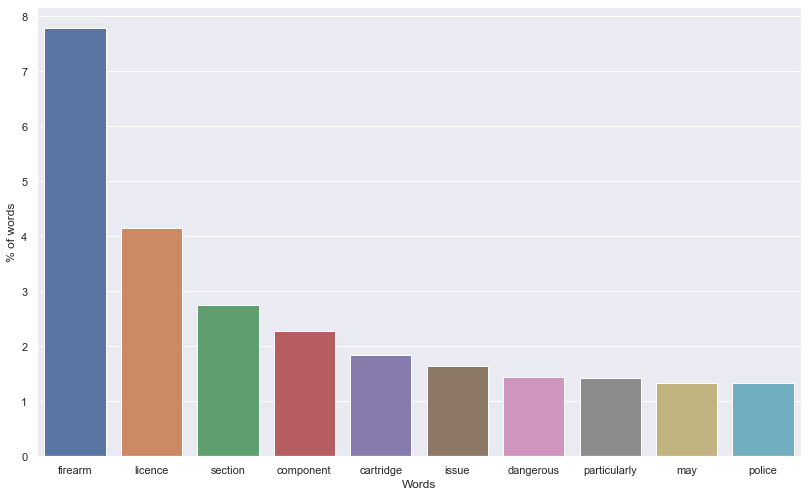

In [32]:
finnish_subset = finnish_df[:10]
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(x = 'Words',
           y = '% of words',
           data = finnish_subset)

In [36]:
us_subset = us_df[us_df['Words'] != '—'][:10]

<AxesSubplot:xlabel='Words', ylabel='% of words'>

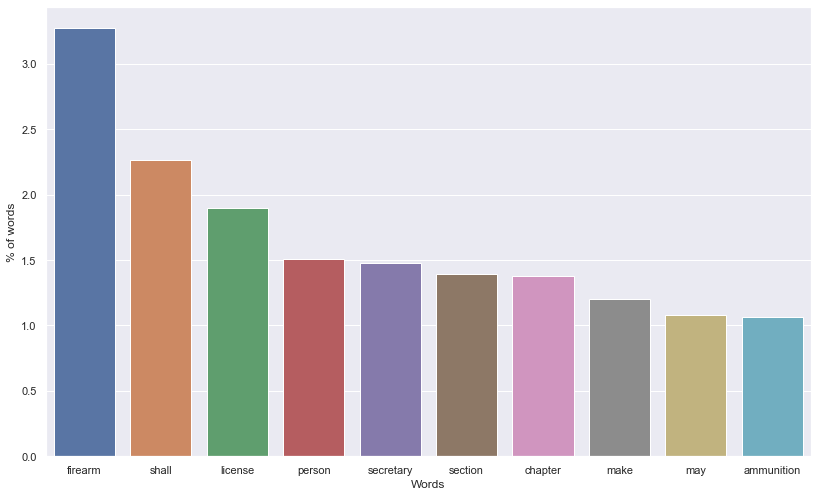

In [37]:
sns.barplot(x = 'Words',
           y = '% of words',
           data = us_subset)

In [19]:
def wordcloudd(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'white',
        random_state = 5)
    wordcloud.generate(str(text))
    image = wordcloud.to_image()
    return image

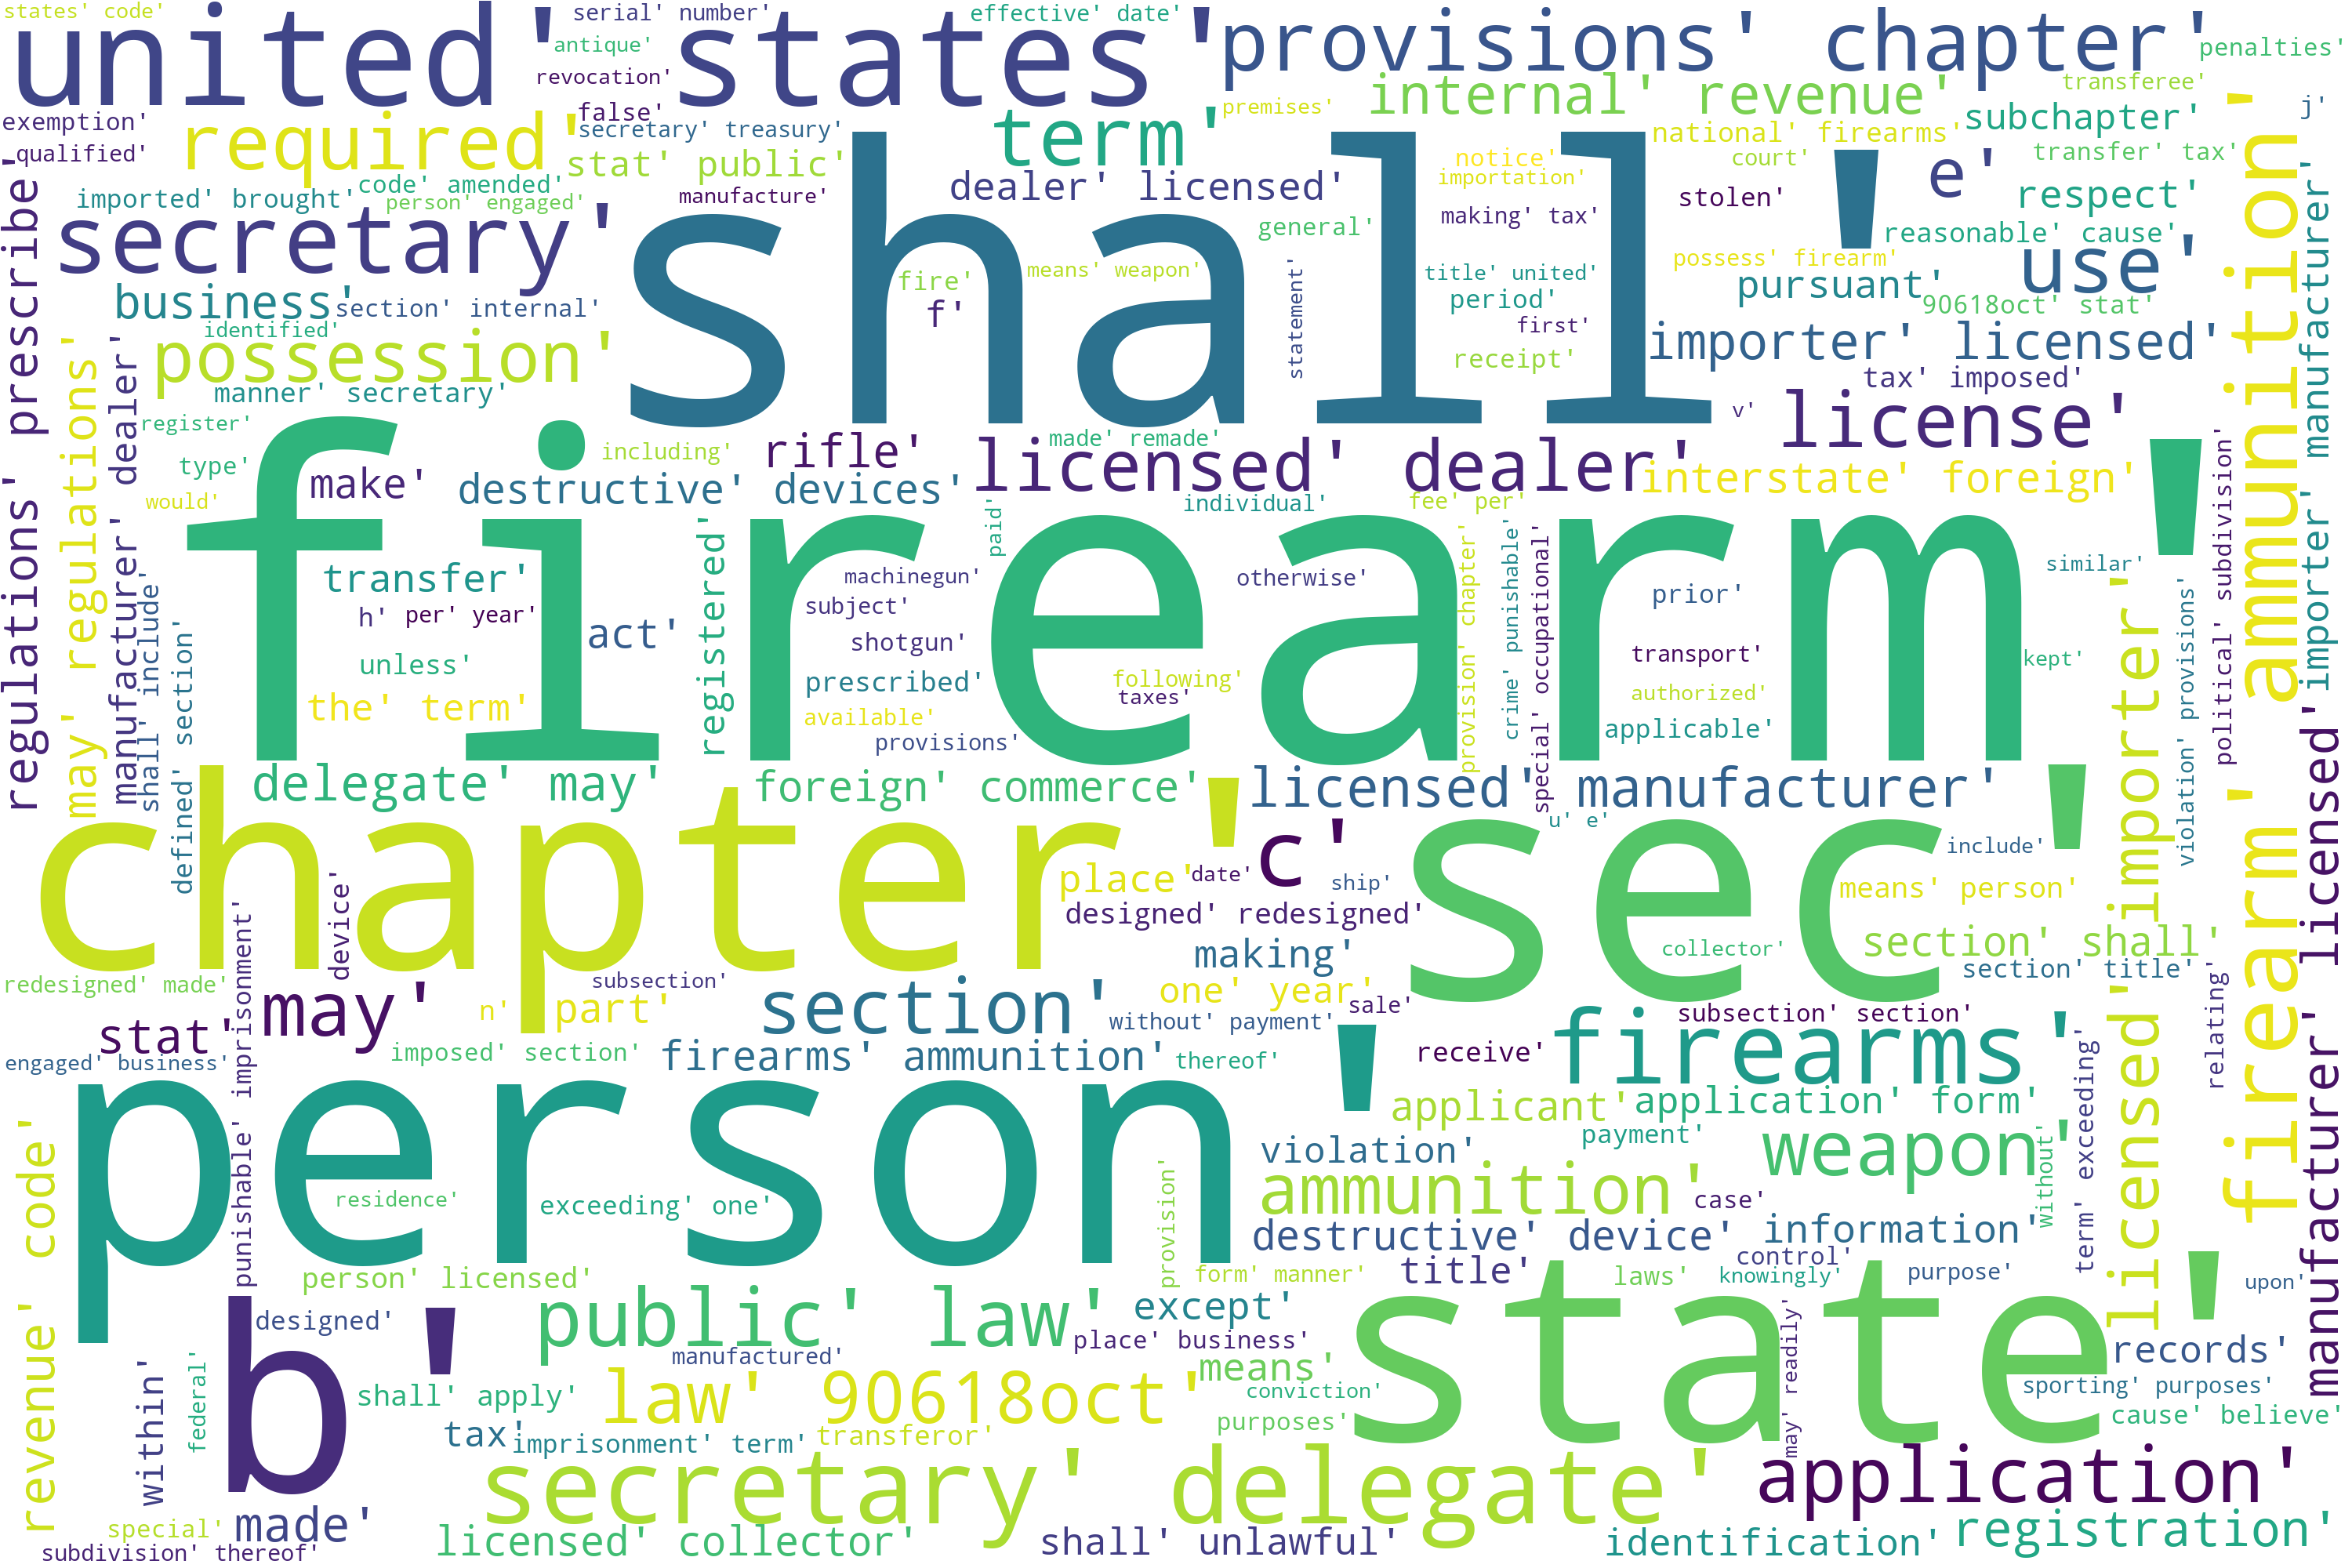

In [20]:
wordcloudd(us_nonstop)

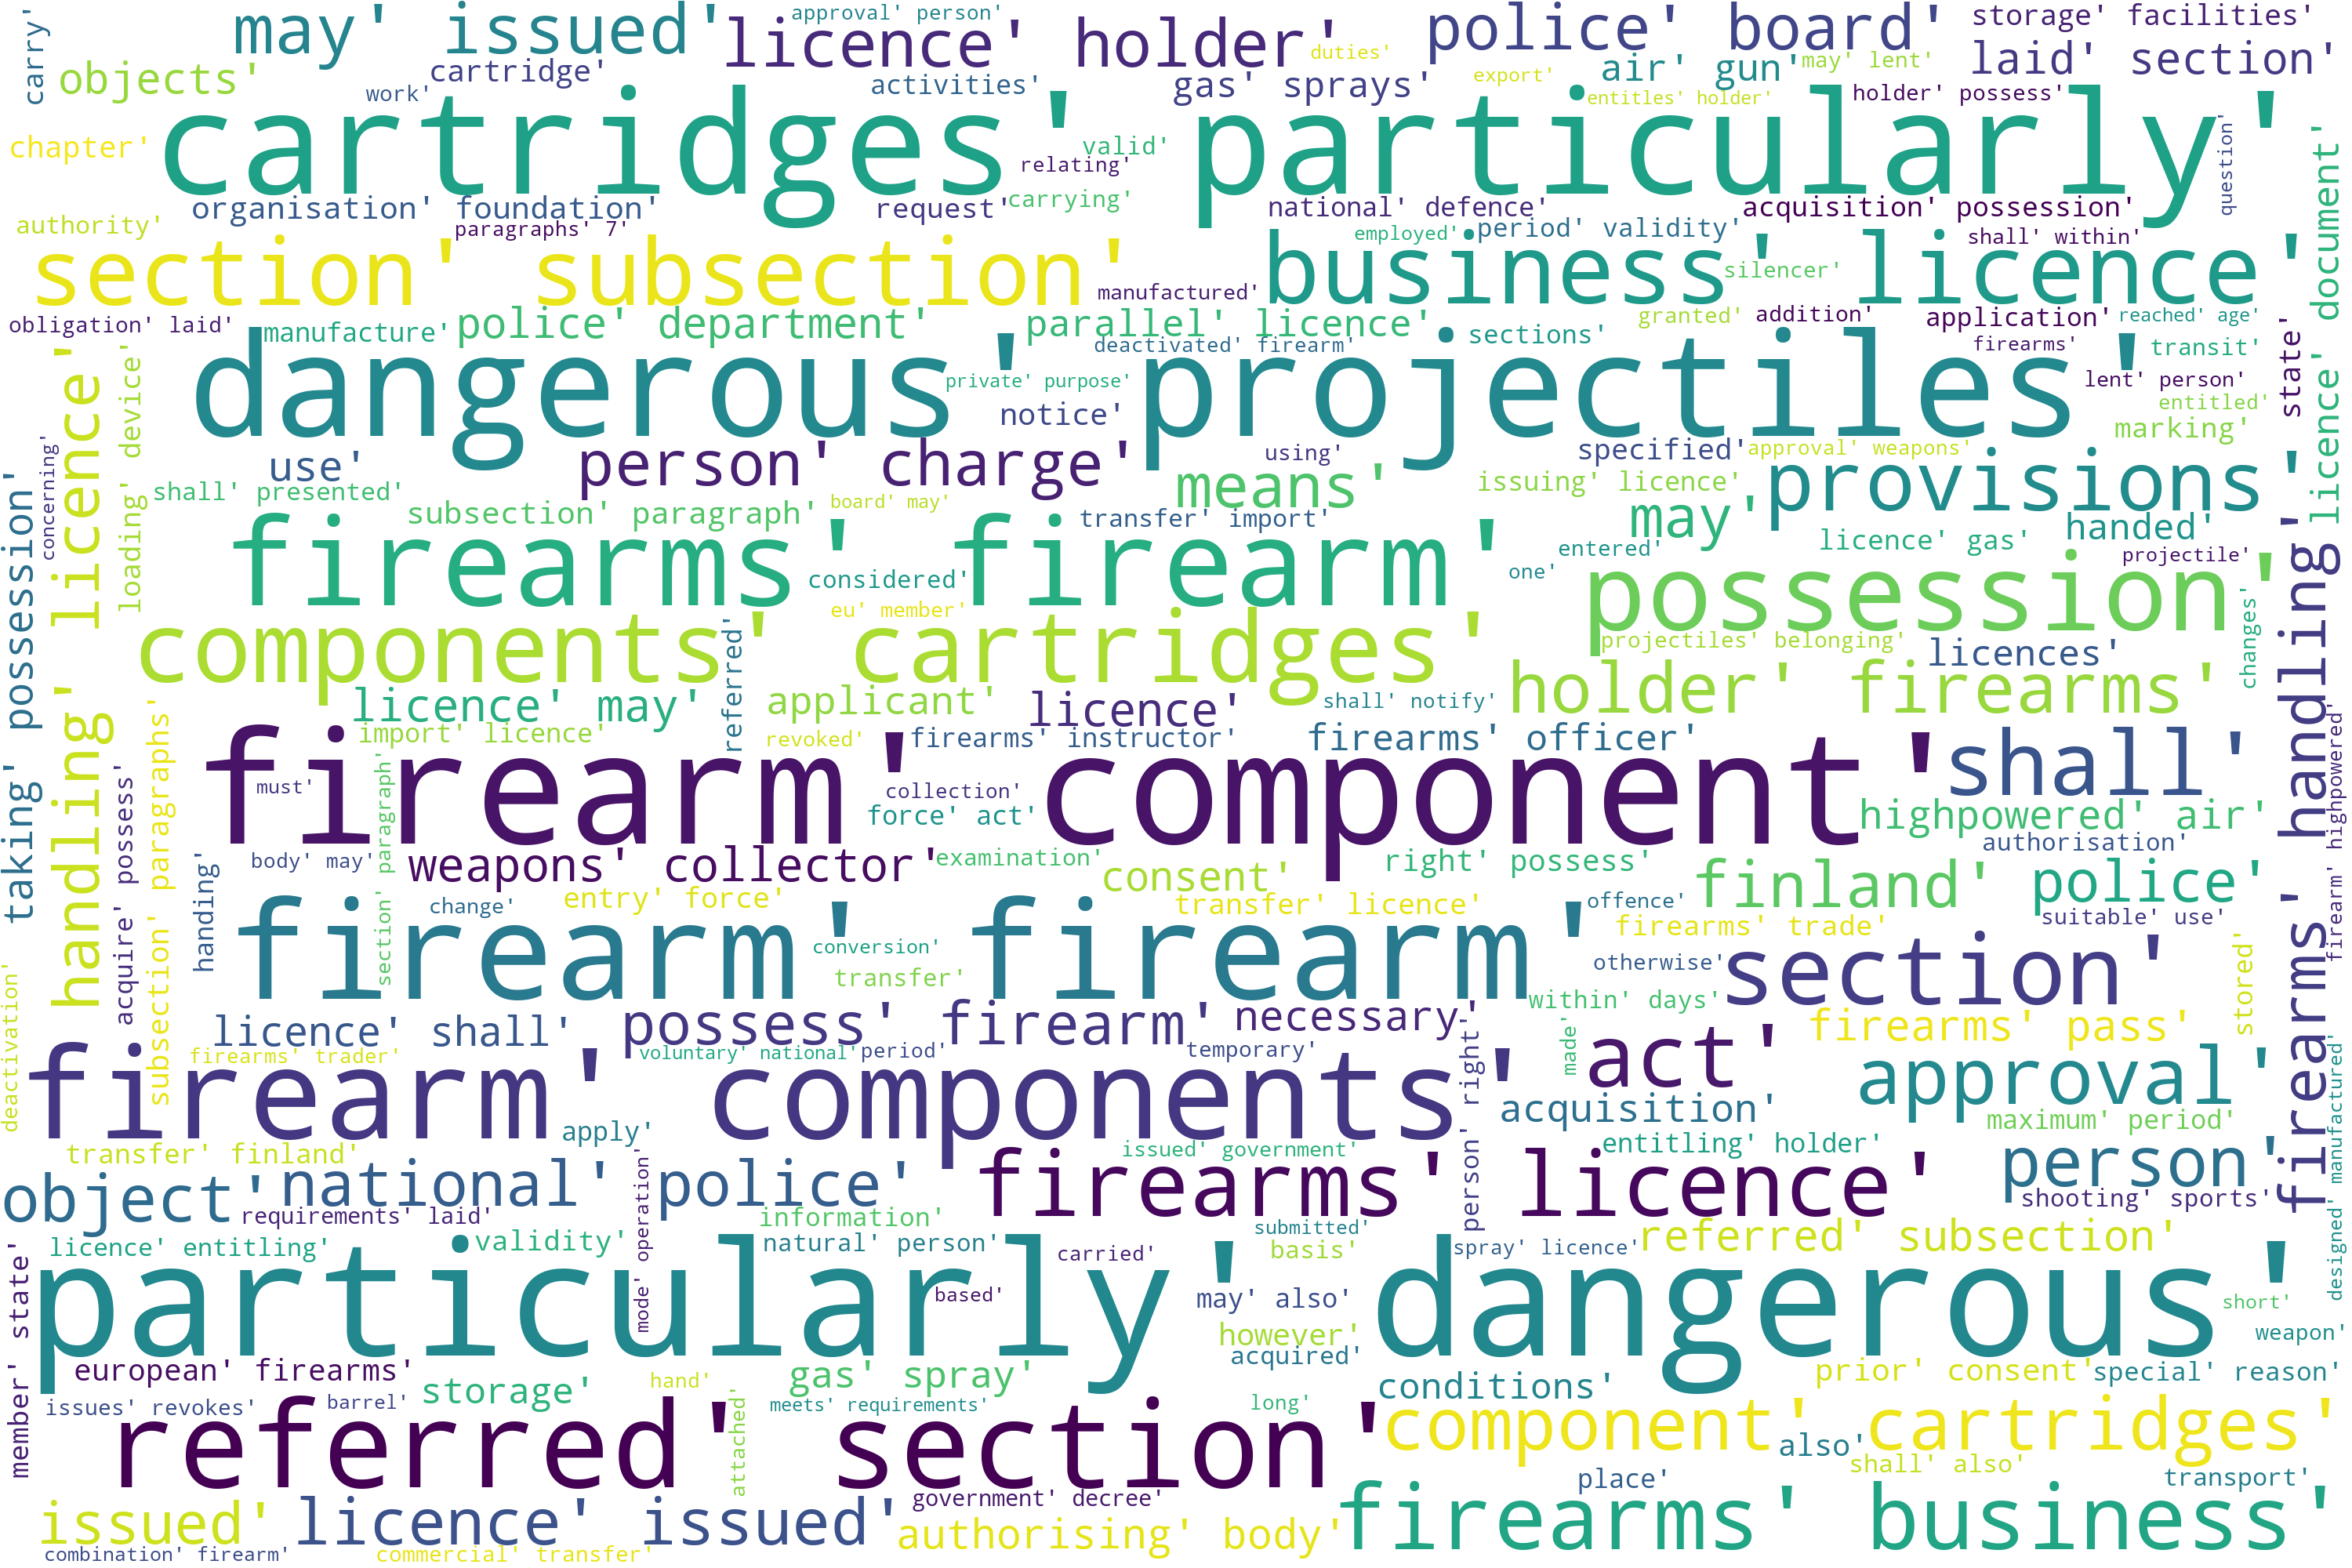

In [21]:
wordcloudd(finnish_nonstop)

# Topic Modeling

In [34]:
vectorize_fin = CountVectorizer()
vectorize_us = CountVectorizer()

In [35]:
vectorize_fin.fit(finnish_nonstop)
vectorize_us.fit(us_nonstop)

CountVectorizer()

In [36]:
vector_fin = vectorize_fin.transform(finnish_nonstop)
vector_us = vectorize_us.transform(us_nonstop)

In [37]:
bigram_vectorizer = CountVectorizer(ngram_range = (1,2),
                                    stop_words = "english",
                                    token_pattern = r'\b\w+\b', 
                                    min_df = 1)

In [38]:
analyze = bigram_vectorizer.build_analyzer()
vocab_finnish = analyze(finnish)
vocab_us = analyze(us)

In [39]:
n_topics = 5

In [40]:
tf_vectorizer = CountVectorizer(max_df = 0.90,
                                   max_features = 500,
                                   stop_words = "english")
cv_fin = tf_vectorizer.fit_transform(finnish_nonstop)
cv_us = tf_vectorizer.fit_transform(us_nonstop)

In [41]:
lda_fin = LatentDirichletAllocation(n_components = n_topics, 
                                max_iter = 20,
                                random_state = 42)

lda_us = LatentDirichletAllocation(n_components = n_topics, 
                                max_iter = 20,
                                random_state = 42)
lda_fin = lda_fin.fit(cv_fin)
lda_us = lda_us.fit(cv_us)

In [42]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx+1))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [44]:
tf_feature_names = tf_vectorizer.get_feature_names()
print("Topics for Finland\n------------------")
print_top_words(lda_fin, tf_feature_names, 8)
print("\nTopics for US\n--------------")
print_top_words(lda_us, tf_feature_names, 8)

Topics for Finland
------------------

Topic #1:
imprisoned, control, tion, available, importing, dealing, department, contract

Topic #2:
purposes, serial, public, redesigned, amended, trust, institution, special

Topic #3:
eligible, delegate, removed, loan, law, read, states, deliver

Topic #4:
imprisonment, comply, pursuant, register, single, oi, amend, provided

Topic #5:
maintain, seizures, prior, satisfaction, kept, weapons, criminal, right

Topics for US
--------------

Topic #1:
law, state, tax, weapon, transfer, year, license, making

Topic #2:
ammunition, firearms, dealer, stat, public, destructive, device, subsection

Topic #3:
shall, licensed, term, united, manufacturer, provisions, delegate, act

Topic #4:
firearm, secretary, chapter, section, sec, application, means, title

Topic #5:
person, states, importer, business, use, regulations, thereof, shotgun


# Conclusion

In conclusion, I believe that certain verbage that is more relevant in Finnish policy poses this as a very serious subject that the government will take very seriously. The themes in Finnish policy that really stick out to me is the words **imprisonment, imprisoned, comply, pursuant, law, seizures** . These lead to themes that are relevant to serious gun control laws with serious penalties.

The verbage I see in the United States are much more relevant to what seems like business and transactions. This makes me think the government is very serious about capitalizing on all gun transactions and this may be the biggest priority to them. The words that stick out to me with this theme are **tax, transfer, dealer, manufacturer, sec, importer, business**.

This is inline with my hypothesis that the verbage used in policy will possibly have an effect either on the unlawful buying or buying with unlawful intent. I was surprised to not see much with regard to safety in the Finnish Act given that access to firearms is not impossible, I would expect a topic theme along the lines of security of the firearms within the home. This makes me wonder about the rates of accidental injury due to firearms within Finland. However the use of control, and focus on punishment and the criminal aspect to gun use could also contribute to just how seriously this is taken in Finland.

With regards to the United States I think my hypothesis was wrong but the outcome could be expected. The outcome I feel was very centric to the sale and manufacturing of weapons. This approach to gun control sounds like an interesting perspective to not explicitely 'take away' any rights of a citizen but to make it more difficult in the manufacturing process. After doing more independent research of this policy though, I learned that it was explicitely coming at the angle of gun sales and distribution. Given that JFK was assassinated from a mail order gun, this policy was the prevent this type of distribution from happening. 